In [1]:
import pandas as pd

file_path = 'spam.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')


In [2]:
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

df['tokens'] = df['text'].apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/guillaumedemerges/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,label,text,tokens
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [6]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Fonction pour lemmatiser une phrase
def lemmatize_sentence(sentence):
    return [lemmatizer.lemmatize(word) for word in sentence]

# Appliquer la lemmatisation
df['lemmas'] = df['tokens'].apply(lemmatize_sentence)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/guillaumedemerges/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/guillaumedemerges/nltk_data...


,label,text,tokens,lemmas
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, go, to, usf, ,, h..."


In [7]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Fonction pour stemmatiser une phrase
def stem_sentence(sentence):
    return [stemmer.stem(word) for word in sentence]

# Appliquer la stemmatisation
df['stems'] = df['tokens'].apply(stem_sentence)
df.head()

,label,text,tokens,lemmas,stems
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, until, jurong, point, ,, crazi, .., avail..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]","[ok, lar, ..., joke, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entri, in, 2, a, wkli, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, ..., U, c, alrea...","[u, dun, say, so, earli, hor, ..., u, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, go, to, usf, ,, h...","[nah, i, do, n't, think, he, goe, to, usf, ,, ..."


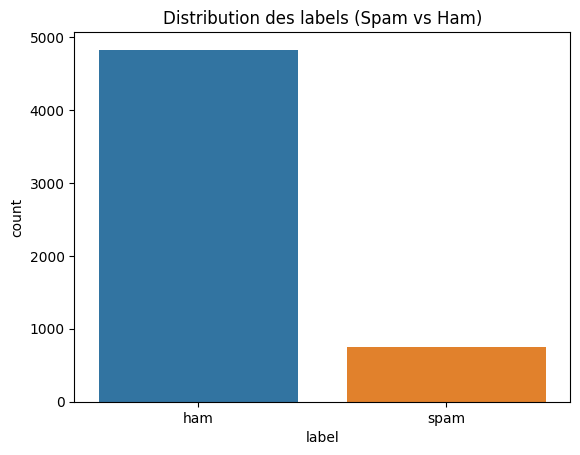

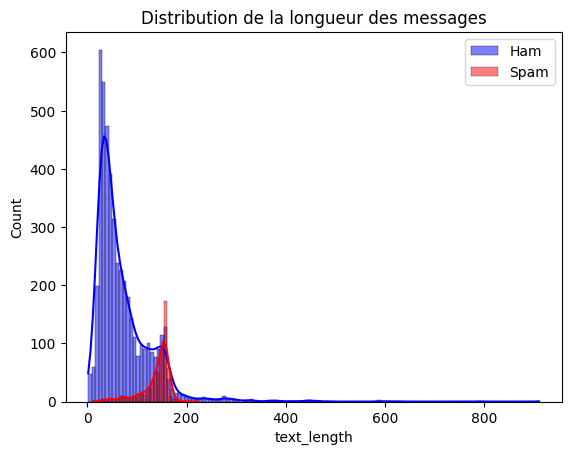

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title('Distribution des labels (Spam vs Ham)')
plt.show()

# Longueur des messages
df['text_length'] = df['text'].apply(len)
sns.histplot(df[df['label'] == 'ham']['text_length'], kde=True, color='blue', label='Ham')
sns.histplot(df[df['label'] == 'spam']['text_length'], kde=True, color='red', label='Spam')
plt.legend()
plt.title('Distribution de la longueur des messages')
plt.show()


In [10]:
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df['cleaned_tokens'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guillaumedemerges/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


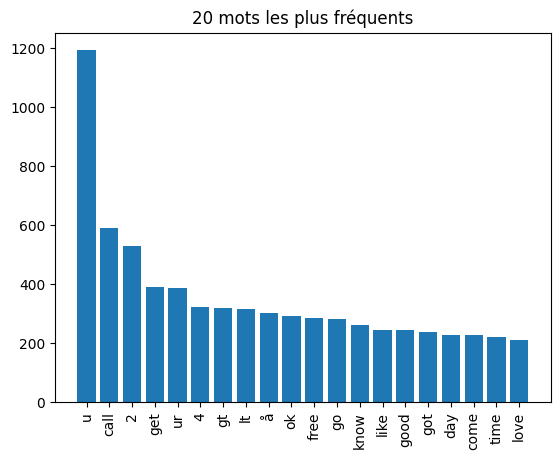

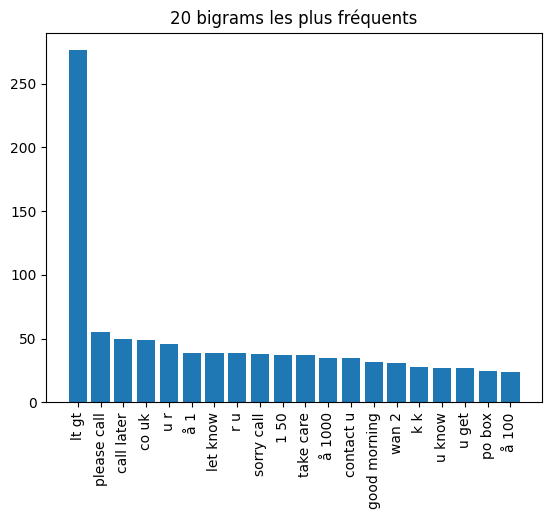

In [11]:
from collections import Counter

# Fréquence des mots
all_words = [word for tokens in df['cleaned_tokens'] for word in tokens]
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Afficher les mots les plus fréquents
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.title('20 mots les plus fréquents')
plt.xticks(rotation=90)
plt.show()

# Fréquence des bigrams
def get_ngrams(tokens, n=2):
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]

all_bigrams = [bigram for tokens in df['cleaned_tokens'] for bigram in get_ngrams(tokens, 2)]
bigram_freq = Counter(all_bigrams)
common_bigrams = bigram_freq.most_common(20)

# Afficher les bigrams les plus fréquents
bigrams, counts = zip(*common_bigrams)
plt.bar(bigrams, counts)
plt.title('20 bigrams les plus fréquents')
plt.xticks(rotation=90)
plt.show()


In [20]:
df['clean_text'] = df['text'].apply(lambda x: x.lower())
ham_words = Counter()
ham_messages = df[df['label'] == 'ham']['clean_text'].apply(lambda x: x.split())

for msg in ham_messages:
    ham_words.update(msg)

print("Mots les plus fréquents dans les messages 'ham':")
print(ham_words.most_common(50))

Mots les plus fréquents dans les messages 'ham':
[('i', 2172), ('you', 1665), ('to', 1544), ('the', 1113), ('a', 1046), ('u', 874), ('and', 845), ('in', 786), ('my', 741), ('is', 710), ('me', 584), ('of', 518), ('for', 496), ('that', 442), ('it', 440), ('have', 433), ('your', 413), ('but', 413), ('are', 405), ('so', 399), ('not', 381), ('on', 379), ('at', 372), ("i'm", 369), ('can', 356), ('if', 346), ('do', 342), ('will', 331), ('be', 325), ('we', 297), ('get', 293), ('just', 286), ('2', 284), ('&lt;#&gt;', 276), ('when', 270), ('with', 269), ('how', 245), ('up', 243), ('go', 235), ('ur', 235), ('what', 235), ('all', 231), ('got', 227), ('this', 226), ('or', 226), ('no', 225), ('.', 222), ('like', 221), ('was', 221), ('call', 215)]


In [21]:
spam_words = Counter()
spam_messages = df[df['label'] == 'spam']['clean_text'].apply(lambda x: x.split())

for msg in spam_messages:
    spam_words.update(msg)

print("\nMots les plus fréquents dans les messages 'spam':")
print(spam_words.most_common(50))


Mots les plus fréquents dans les messages 'spam':
[('to', 682), ('a', 373), ('call', 342), ('your', 263), ('you', 252), ('the', 204), ('for', 201), ('or', 188), ('free', 180), ('2', 169), ('is', 152), ('ur', 144), ('on', 141), ('txt', 136), ('have', 135), ('from', 127), ('and', 122), ('u', 117), ('text', 112), ('mobile', 109), ('with', 108), ('claim', 106), ('reply', 101), ('&', 98), ('of', 95), ('now', 93), ('4', 93), ('stop', 89), ('this', 86), ('our', 85), ('get', 82), ('are', 80), ('just', 77), ('now!', 70), ('in', 69), ('new', 69), ('only', 66), ('send', 65), ('won', 64), ('nokia', 64), ('win', 58), ('prize', 58), ('cash', 56), ('contact', 56), ('-', 55), ('please', 52), ('be', 50), ('we', 48), ('service', 48), ('out', 47)]


In [15]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Télécharger le lexique VADER
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/guillaumedemerges/nltk_data...


True

In [16]:
sia = SentimentIntensityAnalyzer()

# Fonction pour obtenir le score de sentiment
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

df['sentiment'] = df['text'].apply(get_sentiment_scores)

# Extraire les scores de sentiment
df['neg'] = df['sentiment'].apply(lambda x: x['neg'])
df['neu'] = df['sentiment'].apply(lambda x: x['neu'])
df['pos'] = df['sentiment'].apply(lambda x: x['pos'])
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])

df.head()


,label,text,tokens,lemmas,stems,text_length,cleaned_tokens,sentiment,neg,neu,pos,compound
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, until, jurong, point, ,, crazi, .., avail...",111,"[go, jurong, point, crazy, available, bugis, n...","{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...",0.000,0.806,0.194,0.6249
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]","[ok, lar, ..., joke, wif, u, oni, ...]",29,"[ok, lar, joking, wif, u, oni]","{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.000,0.423,0.577,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entri, in, 2, a, wkli, comp, to, win, f...",155,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...",0.000,0.772,0.228,0.7964
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, ..., U, c, alrea...","[u, dun, say, so, earli, hor, ..., u, c, alrea...",49,"[u, dun, say, early, hor, u, c, already, say]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, go, to, usf, ,, h...","[nah, i, do, n't, think, he, goe, to, usf, ,, ...",61,"[nah, think, goes, usf, lives, around, though]","{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",0.113,0.887,0.000,-0.1027


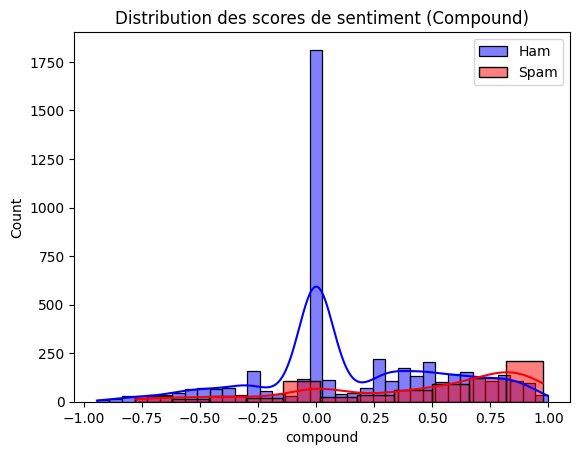

In [17]:
sns.histplot(df[df['label'] == 'ham']['compound'], kde=True, color='blue', label='Ham')
sns.histplot(df[df['label'] == 'spam']['compound'], kde=True, color='red', label='Spam')
plt.legend()
plt.title('Distribution des scores de sentiment (Compound)')
plt.show()


In [18]:
# Messages avec les scores de sentiment les plus positifs
print("Messages les plus positifs:")
print(df.nlargest(5, 'compound')[['text', 'compound']])

# Messages avec les scores de sentiment les plus négatifs
print("Messages les plus négatifs:")
print(df.nsmallest(5, 'compound')[['text', 'compound']])


Messages les plus positifs:
                                                   text  compound
3015  &lt;#&gt;  is fast approaching. So, Wish u a v...    0.9975
1578  How to Make a girl Happy? It's not at all diff...    0.9908
1084  For me the love should start with attraction.i...    0.9808
5318  Good morning, my Love ... I go to sleep now an...    0.9777
2222  Great. I was getting worried about you. Just k...    0.9761
Messages les plus négatifs:
                                                   text  compound
297   Hurt me... Tease me... Make me cry... But in t...   -0.9437
4298  Hurt me... Tease me... Make me cry... But in t...   -0.9437
3564  We know TAJ MAHAL as symbol of love. But the o...   -0.9062
2407  Solve d Case : A Man Was Found Murdered On  &l...   -0.9042
2680  Solve d Case : A Man Was Found Murdered On  &l...   -0.9042


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/guillaumedemerges/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/guillaumedemerges/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guillaumedemerges/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


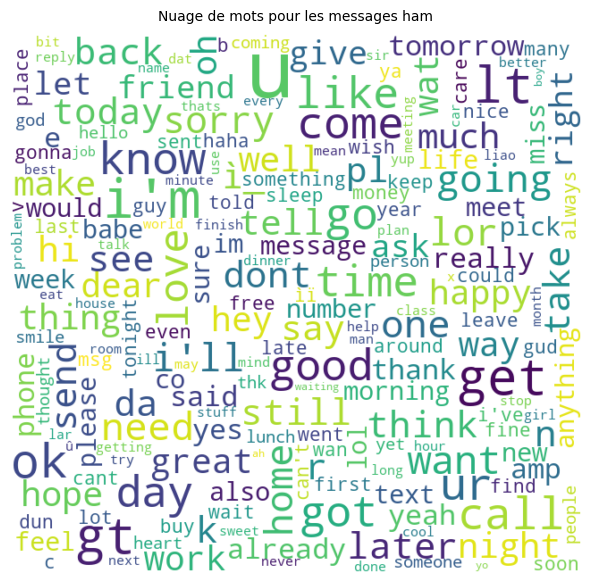

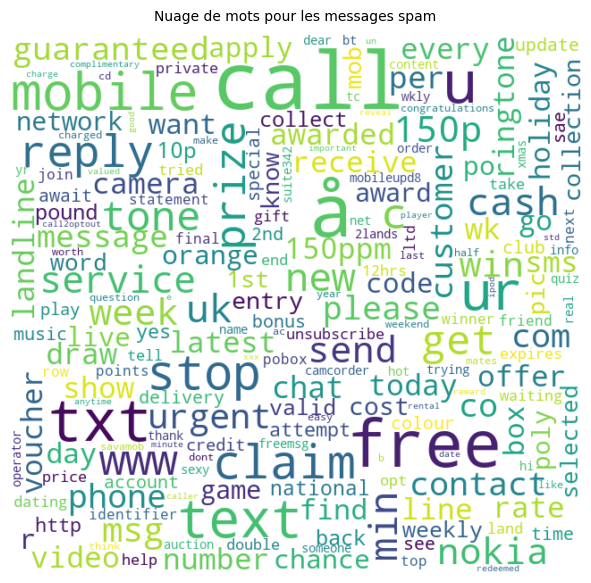

In [29]:
from PIL import Image
from wordcloud import  ImageColorGenerator
import numpy as np
import os
import matplotlib.image as mpimg
from wordcloud import WordCloud

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

# Convertir les listes de tokens en texte
ham_text = ' '.join([' '.join(msg) for msg in ham_messages])
spam_text = ' '.join([' '.join(msg) for msg in spam_messages])

# Fonction pour afficher le nuage de mots
def plot_word_cloud(text, title, mask_path):
    mask = np.array(Image.open(mask_path))
    wc = WordCloud(width=600, height=600, background_color='white', max_words=200, stopwords=stop_words, mask=mask, max_font_size=90, collocations=False, random_state=42)
    wc.generate(text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=10, pad=10)
    plt.show()

# Afficher les nuages de mots
plot_word_cloud(ham_text, 'Nuage de mots pour les messages ham', 'coeur.png')
plot_word_cloud(spam_text, 'Nuage de mots pour les messages spam', 'coeur.png')